# REGRESION


*   Modelo estadístico que te vincula la relación entre una variable respuesta y otras variables explicativas
*   A partir de una serie de valores explicativos, te permite predecir valores de la variable respuesta



In [ ]:
import pandas as pd

df_fish = pd.read_csv("fish.csv")

df_fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


In [ ]:
df_fish.groupby('species').describe()

mass_g                                                                \
         count        mean         std    min     25%    50%     75%     max   
species                                                                        
Bream     35.0  617.828571  209.205709  242.0  462.50  610.0  717.00  1000.0   
Perch     56.0  382.239286  347.617717    5.9  120.00  207.5  692.50  1100.0   
Pike      17.0  718.705882  494.140765  200.0  345.00  510.0  950.00  1650.0   
Roach     20.0  152.050000   88.828916    0.0  104.25  147.5  171.75   390.0   

        length_cm                                                          
            count       mean       std   min     25%    50%     75%   max  
species                                                                    
Bream        35.0  30.305714  3.593699  23.2  28.000  30.40  31.950  38.0  
Perch        56.0  25.735714  8.561572   7.5  19.825  23.25  34.125  41.1  
Pike         17.0  42.476471  9.029087  30.0  35.500  40.10  48.300  59.0  
Roach        20.0  20.645000  3.459917  12.9  18.900  20.50  22.025  29.5

In [ ]:
df_fish.corr()

,mass_g,length_cm
mass_g,1.000000,0.906956
length_cm,0.906956,1.000000


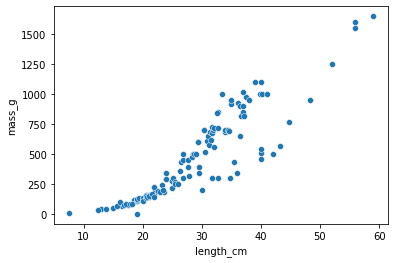

In [ ]:
# Ver relación entre las dos variables
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='length_cm', y='mass_g', data= df_fish)
plt.show()

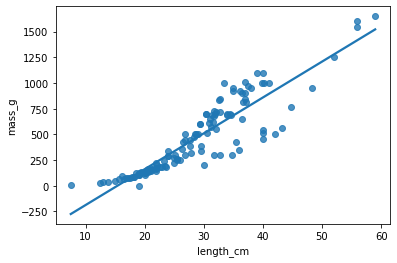

In [ ]:
# Ver relación entre las dos variables
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='length_cm', y='mass_g', ci=None, data= df_fish)
plt.show()

# Cálculo del modelo

In [ ]:
from statsmodels.formula.api import ols

# Calculamos el modelo

mdl_peso_vs_longitud = ols("mass_g~length_cm", data=df_fish).fit()

#Ver parametros
print(mdl_peso_vs_longitud.params)


Intercept   -536.223947
length_cm     34.899245
dtype: float64


In [ ]:
#Predecir masa de peces de rio
import numpy as np
data_explicativa = pd.DataFrame({"length_cm": np.arange(20,80,10)})
print(mdl_peso_vs_longitud.predict(data_explicativa))

0     161.760959
1     510.753412
2     859.745865
3    1208.738318
4    1557.730771
5    1906.723224
dtype: float64


In [ ]:
predicted_data = data_explicativa.assign(mass=mdl_peso_vs_longitud.predict(data_explicativa))
predicted_data

,length_cm,mass
0,20,161.760959
1,30,510.753412
2,40,859.745865
3,50,1208.738318
4,60,1557.730771
5,70,1906.723224


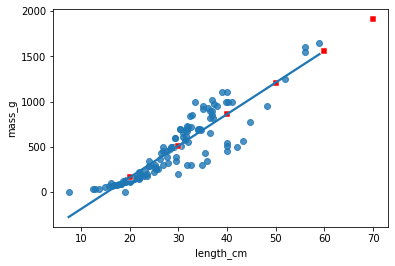

In [ ]:
fig = plt.figure()
sns.regplot(x='length_cm', y='mass_g', ci=None, data= df_fish)
sns.scatterplot(x='length_cm', y='mass',data=predicted_data, color='red', marker='s')
plt.show()


## Repito proceso (centrandome en las doradas)

In [ ]:
df_dor = df_fish[df_fish['species']=='Bream']
df_dor

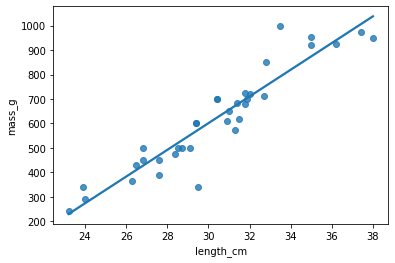

In [ ]:
# Observo si existe relación entre variables
sns.regplot(x='length_cm', y='mass_g', ci=None, data= df_dor)
plt.show()

In [ ]:
# muestro valor de la relación
df_dor.corr()

,mass_g,length_cm
mass_g,1.00000,0.93705
length_cm,0.93705,1.00000


In [ ]:
mdl_len_pes_dor = ols("mass_g~length_cm",data=df_dor).fit()

In [ ]:
valoresApredecir = pd.DataFrame({"length_cm": np.arange(30,50)})
predicciones = mdl_len_pes_dor.predict(valoresApredecir)
print(predicciones)

In [ ]:
df_predict = valoresApredecir.assign(mass=predicciones)
df_predict

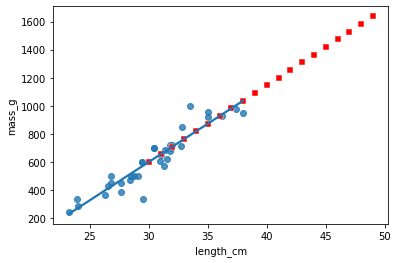

In [ ]:
fig = plt.figure()
sns.regplot(x='length_cm', y='mass_g', ci= None,data= df_dor)
sns.scatterplot(x='length_cm', y='mass', data= df_predict, color ='red', marker='s')
plt.show()

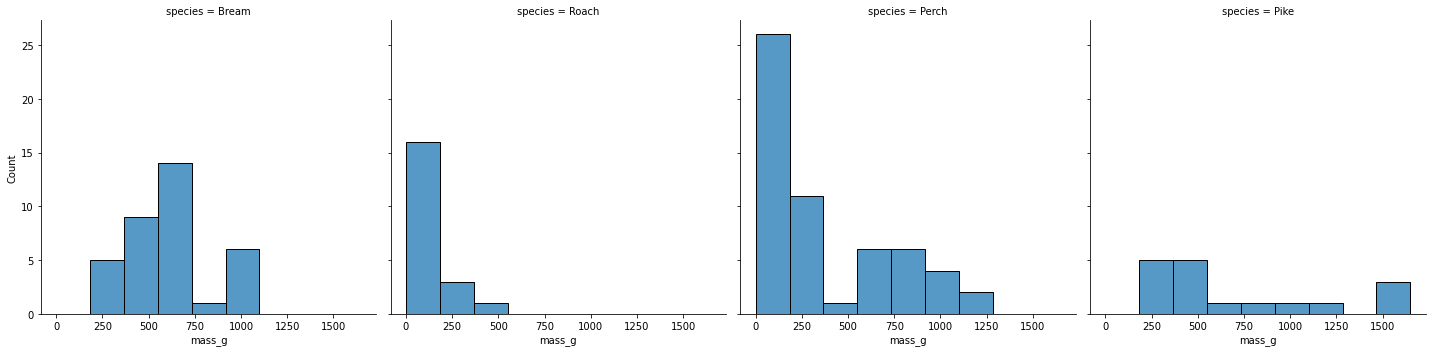

In [ ]:
# Comparamos species

sns.displot(data=df_fish,x="mass_g",col="species",bins=9)
plt.show()

In [ ]:
df_fish.groupby('species')["mass_g"].mean()

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64

In [ ]:
mdl_pesovsspecies = ols("mass_g~species+0", data=df_fish).fit()

In [ ]:
print(mdl_pesovsspecies.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64
